In [ ]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt

## Obtenção dos Dados


In [ ]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv('/content/airbnb.csv', delimiter=';')

# mostrar as 5 primeiras entradas
df.head()

,nome,cômodos,bairro,estrelas,tipoAcomodacao,preço
0,Apartamento em João Pessoa,3 camas,João Pessoa,"4,83",Apartamento,R$197
1,Apartamento em João Pessoa,2 camas,João Pessoa,"4,93",Apartamento,R$174
2,Apartamento em João Pessoa,2 camas,João Pessoa,0,Apartamento,R$348
3,Apartamento em João Pessoa,1 cama,João Pessoa,"5,0",Apartamento,R$150
4,Apartamento em Jardim Oceania,3 camas,Jardim Oceania,"4,94",Apartamento,R$145


## Análise dos Dados


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [ ]:
df.shape

(264, 6)

In [ ]:
df['preço'] = df['preço'].str.replace('R$', '', regex=False)
df['preço'] = df['preço'].astype(float)

In [ ]:
# identificar o volume de dados do DataFrame
print(f"Entradas:\t {df.shape[0]}")
print(f"Variáveis:\t {df.shape[1]}\n")
print("Tipos das Variáveis\n")

# verificar os tipos de variáveis do dataset
df.dtypes


Entradas:	 264
Variáveis:	 6

Tipos das Variáveis



nome               object
cômodos            object
bairro             object
estrelas           object
tipoAcomodacao     object
preço             float64
dtype: object

### **Q3. Qual o tipo de distribuição das variáveis?**

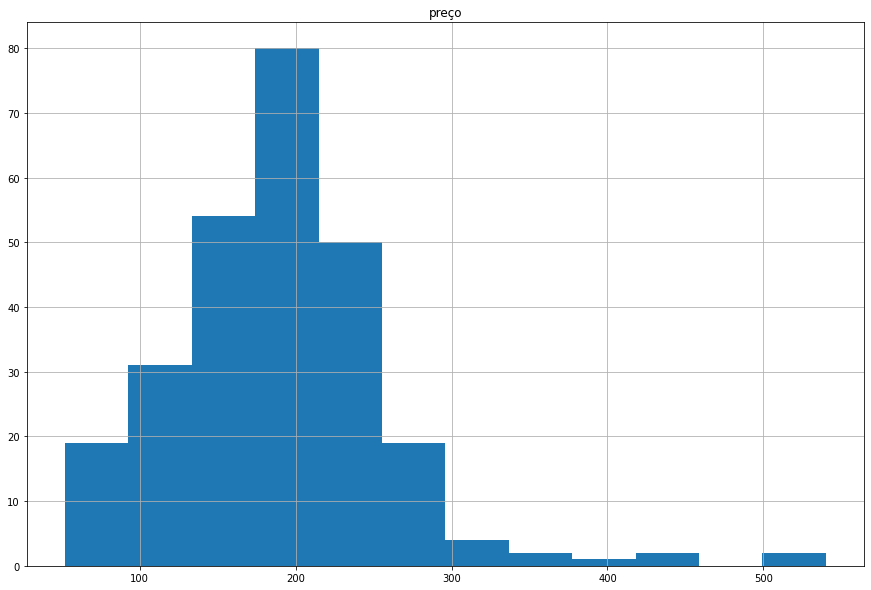

In [ ]:
# plotar o histograma das variáveis numéricas
df.hist(bins=12, figsize=(15,10));

In [ ]:
df.describe()

,preço
count,264.000000
mean,190.246212
std,69.564014
min,52.000000
25%,148.750000
50%,186.500000
75%,230.000000
max,540.000000


### **Q4. Qual a média dos preços de aluguel?**

In [ ]:
# ver a média da coluna price
df.preço.mean()

190.24621212121212

In [ ]:
#Vamos criar um ponto de corte para os precos
q1_preço = df.preço.quantile(0.25)
q3_preço = df.preço.quantile(0.75)
IQR_preço = q3_preço - q1_preço
sup_preço = q3_preço + 1.5 * IQR_preço
inf_preço = q1_preço - 1.5 * IQR_preço

print(f'''Variável preço=> Q1={q1_preço},
      Q3={q3_preço},
      IQR={IQR_preço},
      Limite superior={sup_preço},
      Limite inferior={inf_preço}''')

Variável preço=> Q1=148.75,
      Q3=230.0, 
      IQR=81.25, 
      Limite superior=351.875, 
      Limite inferior=26.875


Boxplot para price

preço: valores acima de 351.875 a valores = 0:
6 entradas
2.273%


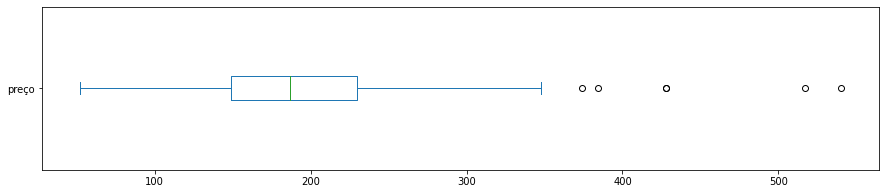

In [ ]:
df.preço.plot(kind='box', vert=False, figsize=(15, 3))

# ver quantidade de valores acima de sup_minimum_nights para minimum_nights
print(f"preço: valores acima de {sup_preço} a valores = 0:")
print(f"{len(df[df.preço > sup_preço])+len(df[df.preço == 0])} entradas")
print(f"{(len(df[df.preço > sup_preço])+len(df[df.preço == 0])) / df.shape[0]*100:.4}%")

In [ ]:
df_clean = df.copy()
df_clean[df_clean.preço > sup_preço].index

Int64Index([88, 109, 189, 218, 240, 245], dtype='int64')

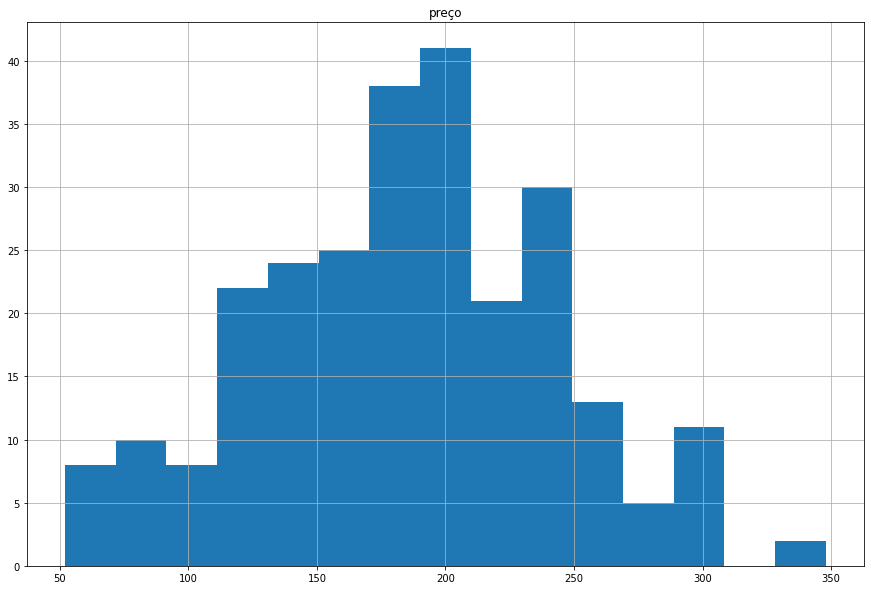

In [ ]:
#Eliminando linhas com outlayers
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.preço > sup_preço].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.preço == 0].index, axis=0, inplace=True)

# Histograma após limpeza dos dados
df_clean.hist(bins=15, figsize=(15,10));

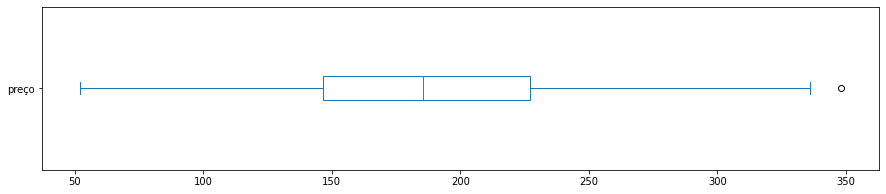

In [ ]:
#Boxplot preço após retirar outliers
df_clean.preço.plot(kind='box', vert=False, figsize=(15, 3));

### **Q7. Qual o tipo de imóvel mais alugado no Airbnb?**

In [ ]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.tipoAcomodacao.value_counts()

Apartamento       199
Outro              35
Quarto inteiro     24
Name: tipoAcomodacao, dtype: int64

In [ ]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.tipoAcomodacao.value_counts() / df_clean.shape[0]*100

Apartamento       77.131783
Outro             13.565891
Quarto inteiro     9.302326
Name: tipoAcomodacao, dtype: float64

Apartamento       77.131783
Outro             13.565891
Quarto inteiro     9.302326
Name: tipoAcomodacao, dtype: float64


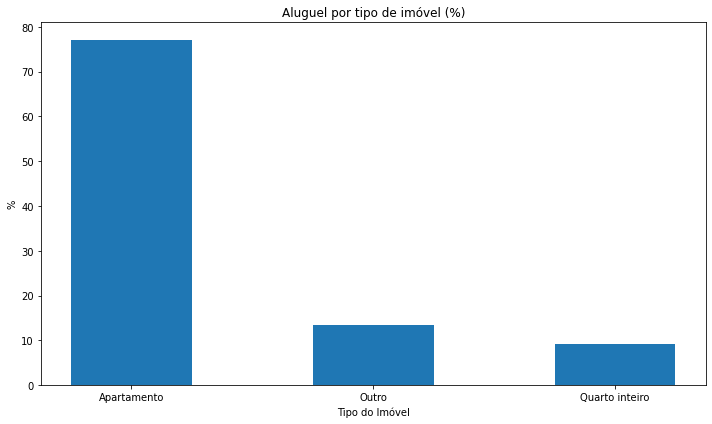

In [ ]:
tipo_acomodacao = (df_clean.tipoAcomodacao.value_counts()/df_clean.shape[0]*100).sort_values(ascending=False)

print(tipo_acomodacao)
df_acomodacao = pd.DataFrame([tipo_acomodacao.keys(),tipo_acomodacao.values]).transpose()

df_acomodacao.columns=['Tipo_Acomodacao','Porcentagem']

fig, ax = plt.subplots(figsize=(10,6))
tipo_acomodacao = ax.bar(df_acomodacao['Tipo_Acomodacao'],
                         df_acomodacao['Porcentagem'],0.5, label = 'Porcentagem')

ax.set_title("Aluguel por tipo de imóvel (%)")
ax.set_xlabel("Tipo do Imóvel")
ax.set_ylabel("%")

plt.tight_layout()

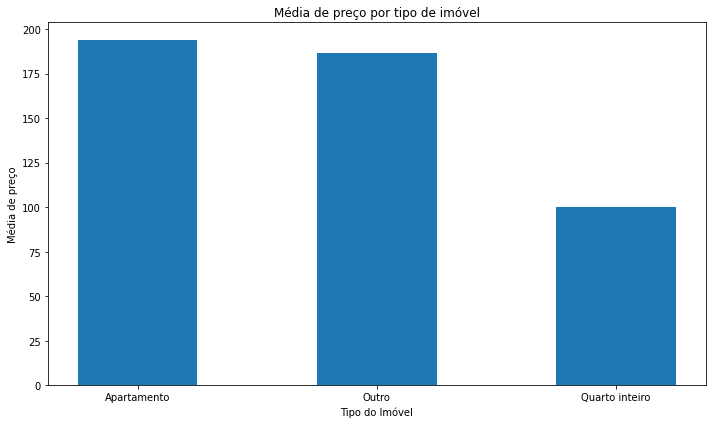

In [ ]:
tipo_acomodacao = (df_clean.groupby('tipoAcomodacao').preço.mean().
                   sort_values(ascending=False))
df_acomodacao = pd.DataFrame([tipo_acomodacao.keys(),tipo_acomodacao.values]).transpose()
df_acomodacao.columns=['tipoAcomodacao','Mean']

fig, ax = plt.subplots(figsize=(10,6))
tipo_acomodacao = ax.bar(df_acomodacao['tipoAcomodacao'],df_acomodacao['Mean'],0.5,
                         label = 'Média')


ax.set_title("Média de preço por tipo de imóvel")
ax.set_xlabel("Tipo do Imóvel")
ax.set_ylabel("Média de preço")

plt.tight_layout()

### **Q8. Qual a localidade mais cara do dataset?**
Uma maneira de se verificar uma variável em função da outra é usando `groupby()`. No caso, queremos comparar os bairros (*neighbourhoods*) a partir do preço de locação.


In [ ]:
# ver preços por bairros, na média
df_clean.groupby('bairro').preço.mean().sort_values(ascending=False)
bairros_media =   df_clean.groupby('bairro').preço.mean().sort_values(ascending=False)
bairros_minimo =  df_clean.groupby('bairro').preço.min().sort_values(ascending=False)
bairros_maximo =  df_clean.groupby('bairro').preço.max().sort_values(ascending=False)
bairros_qt     =  df_clean['bairro'].value_counts()


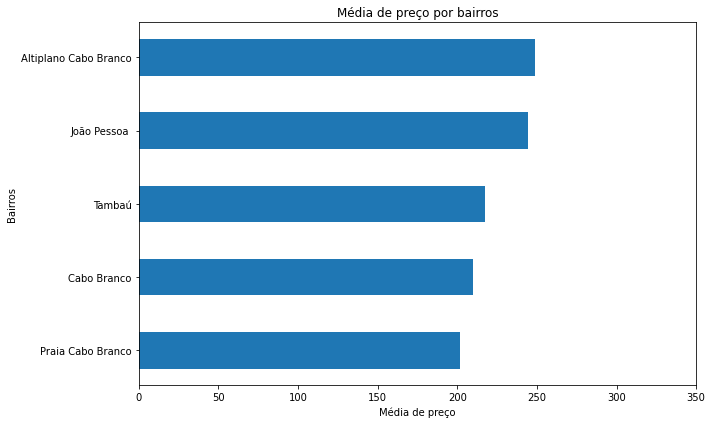

In [ ]:
bairro = df_clean.groupby('bairro').preço.mean().sort_values(ascending=False)
bairro.drop(index='João Pessoa', inplace=True)
bairro = bairro.head().sort_values()
df_acomodacao = pd.DataFrame([bairro.keys(),bairro.values]).transpose()
df_acomodacao.columns=['Bairro','Mean']

fig, ax = plt.subplots(figsize=(10,6))
tipo_acomodacao = ax.barh(df_acomodacao['Bairro'],df_acomodacao['Mean'],0.5)

ax.set_title("Média de preço por bairros")
ax.set_xlabel("Média de preço")
ax.set_ylabel("Bairros")
ax.set_xlim((0,350))

plt.tight_layout()

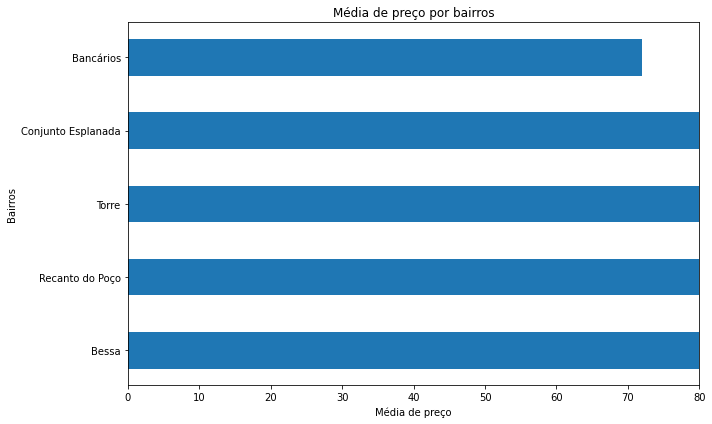

In [ ]:
bairro = (df_clean.groupby('bairro').preço.mean().sort_values(ascending=False))
bairro = bairro.tail().sort_values(ascending=False)
df_acomodacao = pd.DataFrame([bairro.keys(),bairro.values]).transpose()
df_acomodacao.columns=['Bairro','Mean']

fig, ax = plt.subplots(figsize=(10,6))
tipo_acomodacao = ax.barh(df_acomodacao['Bairro'],df_acomodacao['Mean'],0.5)



ax.set_title("Média de preço por bairros")
ax.set_xlabel("Média de preço")
ax.set_ylabel("Bairros")
ax.set_xlim((0,80))

plt.tight_layout()

### **Q7. Qual a média de preço por tipo de imóvel?**

In [ ]:
df_clean.groupby('tipoAcomodacao').preço.mean().sort_values(ascending=False)

tipoAcomodacao
Apartamento       194.060302
Outro             186.800000
Quarto inteiro     99.916667
Name: preço, dtype: float64